In the header, please include:
Victoria Love Franklin


* MSBD566
* September 18,2025
* Honor Statement



**Assignment STEPS **

**Prepare Files on Your Local Machine**

* Create a folder on your computer called MSBD566.
* Inside it, create a subfolder called Assignment 1.
* Save these files into the Assignment 1 folder:
* MSBD566_LastName_FirstName_Assignment1.ipynb
* Air_Quality_and_Pollen_Count.csv (the dataset)
* Add a README.md file with content:

Data Analysis Tasks:
- Upload Air_Quality_and_Pollen_Count
- Plot AQI, count unhealthy days, analyzing pollen types, and comparing manual vs. vectorized methods.

Create and Upload Your Assignment to GitHub
*   Create a public GitHub repository called MSBD566.
*   Inside it, add:
     * Your Jupyter Notebook: MSBD566_Franklin_Victoria_Assignment1.ipynb
     * The dataset: Air_Quality_and_Pollen_Count.csv
     * A README.md with repo description and last edited date.

**Upload Files to GitHub**

* Go to your MSBD566 repo on GitHub.
* Click “Add file”  “Upload files.”
* Drag and drop your Assignment 1 folder (with the notebook, dataset, and README).
* Scroll down and click Commit changes.

# Problem 1
The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:

| Pollen Count Range | Pollen Level   |
|--------------------|----------------|
| 0.0 – 2.4          | Low            |
| 2.5 – 4.8          | Low – Medium   |
| 4.9 – 7.2          | Medium         |
| 7.3 – 9.6          | Medium – High  |
| 9.7 – 12.0         | High           |


**Source: **
1. https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about
2. https://www.nashville.gov/departments/health/environmental-health/air-pollution￾control/daily-aqi-and-pollen-count

# Question 1: Explore the data by plotting AQI and Category across the years in two separate plots. Make sure they have proper labels and titles. Use a datetime format for the dates.
*   **a.** How many times has the AQI been recorded above 120?
*   **b.** When did the Air Quality Index Category become unhealthy?

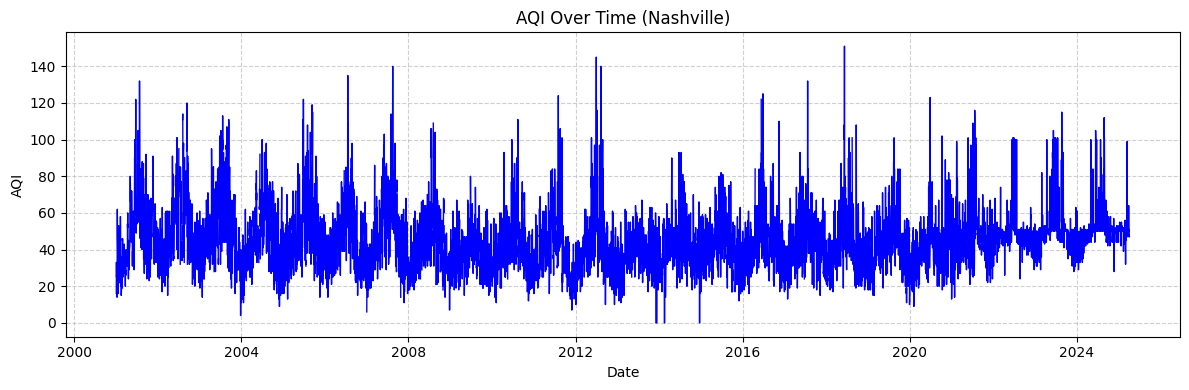

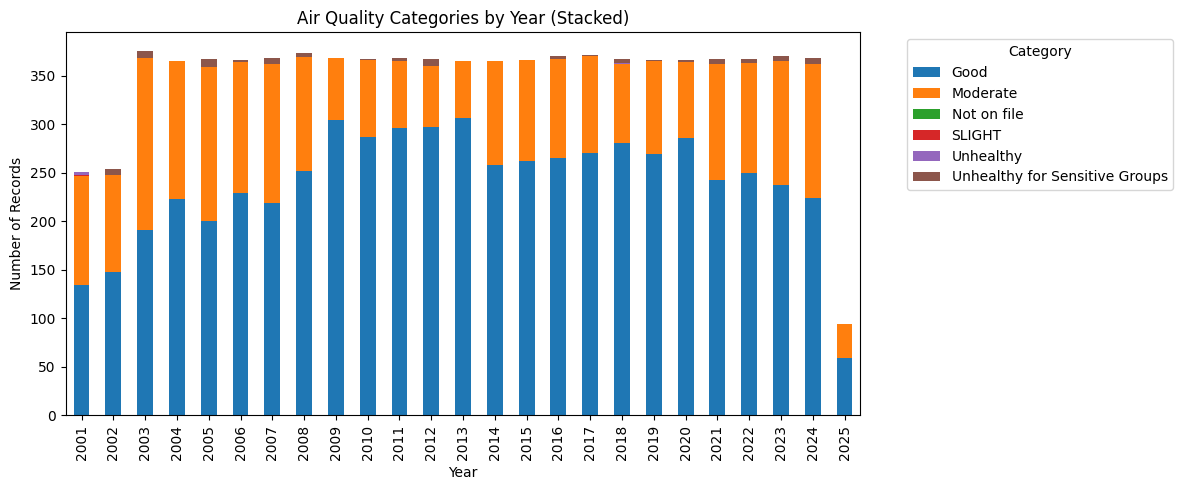

a) Number of times AQI > 120: 14
b) Dates when AQI Category reached 'Unhealthy' (or worse):
 - 2001-06-21
 - 2001-07-12
 - 2001-07-24
 - 2002-06-17
 - 2002-08-05
 - 2002-08-06
 - 2002-09-10
 - 2002-09-11
 - 2002-09-12
 - 2003-06-25
 - 2003-07-04
 - 2003-07-05
 - 2003-07-21
 - 2003-08-26
 - 2003-08-27
 - 2003-09-12
 - 2003-09-13
 - 2005-06-23
 - 2005-06-26
 - 2005-06-27
 - 2005-08-01
 - 2005-08-26
 - 2005-09-10
 - 2005-09-11
 - 2005-09-14
 - 2006-07-19
 - 2006-07-21
 - 2007-06-03
 - 2007-08-01
 - 2007-08-04
 - 2007-08-05
 - 2007-08-15
 - 2007-08-16
 - 2008-07-18
 - 2008-07-19
 - 2008-08-05
 - 2008-08-21
 - 2010-08-14
 - 2011-08-03
 - 2011-08-19
 - 2011-09-04
 - 2012-05-19
 - 2012-06-28
 - 2012-06-29
 - 2012-06-30
 - 2012-07-07
 - 2012-07-08
 - 2012-08-09
 - 2016-06-11
 - 2016-06-26
 - 2016-11-14
 - 2017-07-22
 - 2018-06-07
 - 2018-06-09
 - 2018-07-20
 - 2018-08-15
 - 2018-09-20
 - 2019-08-17
 - 2020-06-27
 - 2020-10-09
 - 2021-05-25
 - 2021-07-06
 - 2021-07-22
 - 2021-07-23
 - 2021-07-3

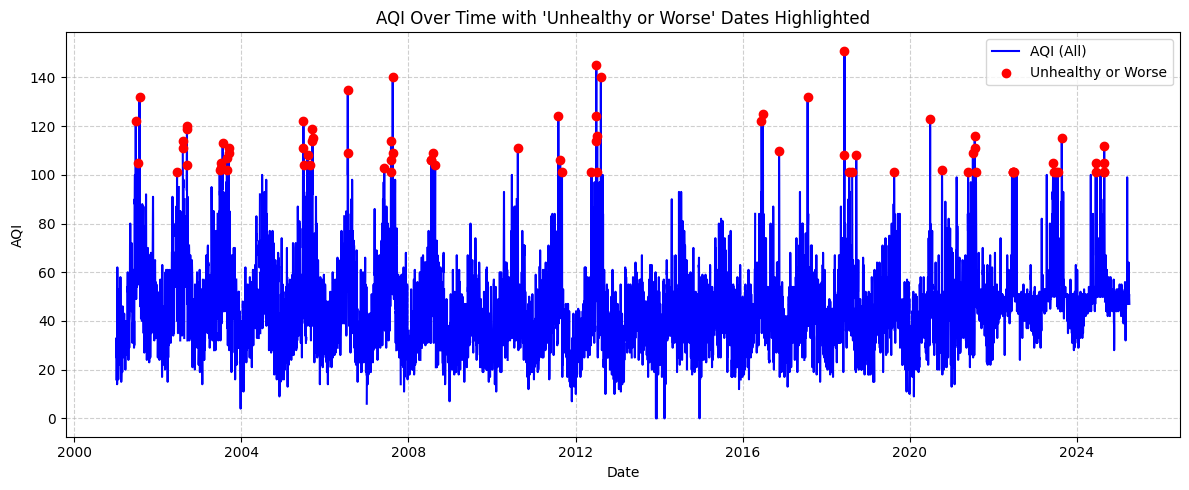

In [6]:
# Question 1: Explore AQI and Category across the years

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Air_Quality_and_Pollen_Count.csv")

# Parse dates
df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'], errors='coerce')
df = df.sort_values('ReportDateTime').reset_index(drop=True)

# --- Plot 1: AQI over time ---
plt.figure(figsize=(12, 4))
plt.plot(df['ReportDateTime'], df['AQI'], color='blue', linewidth=1)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Over Time (Nashville)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Category counts by year ---
cat_df = df.copy()
cat_df['Year'] = cat_df['ReportDateTime'].dt.year
pivot_counts = pd.pivot_table(
    cat_df, index='Year', columns='Category',
    values='AQI', aggfunc='count'
).fillna(0)

pivot_counts.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title("Air Quality Categories by Year (Stacked)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Part a: How many times has the AQI been recorded above 120? ---
aqi_over_120 = (df['AQI'] > 120).sum()
print("a) Number of times AQI > 120:", aqi_over_120)

# --- Part b: All dates when AQI Category was 'Unhealthy' (or worse) ---
unhealthy_labels = {
    "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"
}

# Filter dataset
unhealthy_df = df[df['Category'].isin(unhealthy_labels)][
    ['ReportDateTime', 'AQI', 'Category']
].sort_values('ReportDateTime')

# Show unique dates (no duplicates for the same day)
unhealthy_dates = unhealthy_df['ReportDateTime'].dt.date.unique()

print("b) Dates when AQI Category reached 'Unhealthy' (or worse):")
for d in unhealthy_dates:
    print(" -", d)

# --- Plot AQI with unhealthy dates highlighted ---
plt.figure(figsize=(12, 5))
plt.plot(df['ReportDateTime'], df['AQI'], color="blue", label="AQI (All)")
plt.scatter(
    unhealthy_df['ReportDateTime'], unhealthy_df['AQI'],
    color="red", label="Unhealthy or Worse", zorder=5
)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Over Time with 'Unhealthy or Worse' Dates Highlighted")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()





# Question 2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

Removed missing nan values from dataset.

Most frequent pollen type: Grass

Top 10 pollen types by frequency:

PollenType
Grass      2330
Ragweed     603
Cedar       405
Elm         398
Alder       291
Juniper     235
Birch       181
Maple       132
Hickory      88
Oak          15
Name: count, dtype: int64


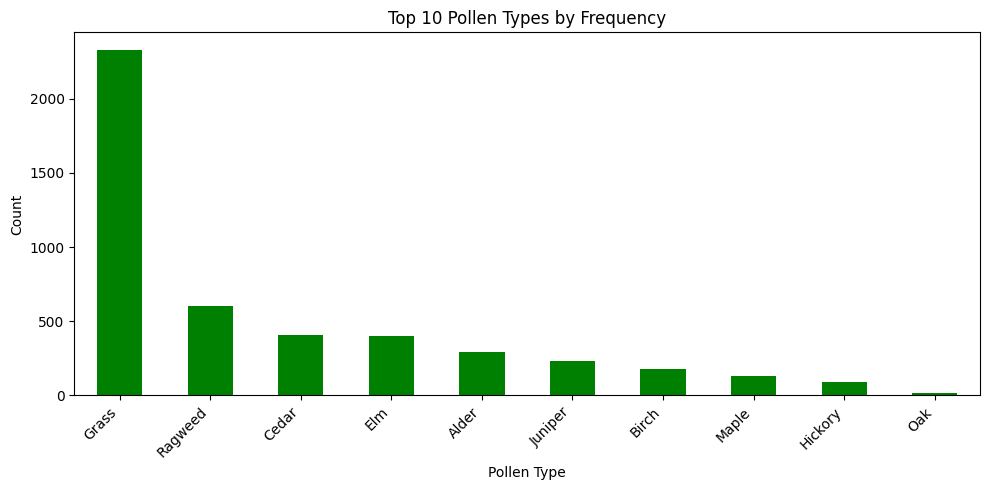

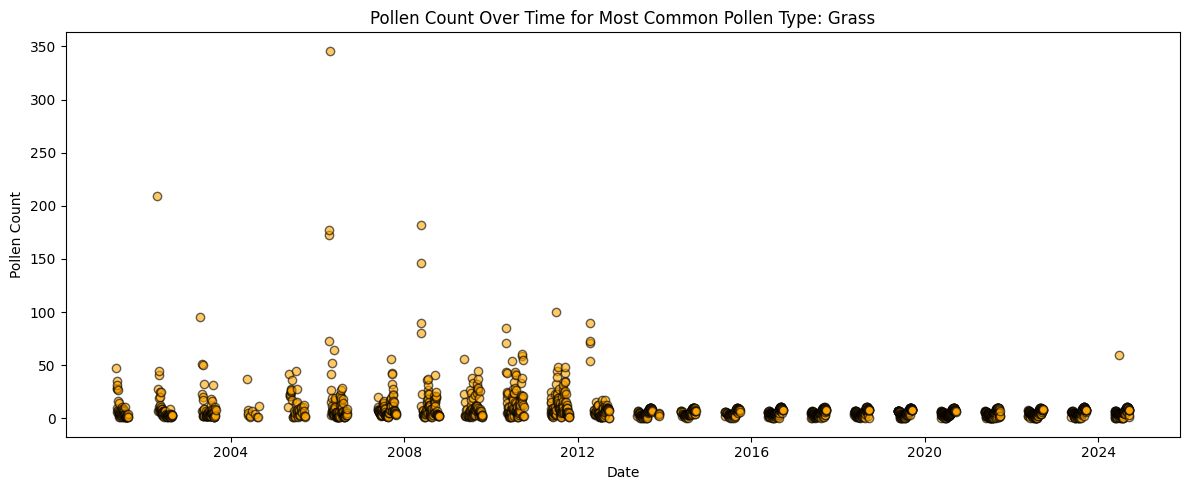

In [8]:
# Question 2: Which pollen type occurs the most?

# Drop rows where PollenType is missing (NaN)
df_clean = df.dropna(subset=['PollenType'])

# Count frequency of each pollen type
pollen_counts = df_clean['PollenType'].value_counts()

# Print most common pollen type
print("Most frequent pollen type:", pollen_counts.idxmax())
print("\nTop 10 pollen types by frequency:\n")
print(pollen_counts.head(10))

# --- Bar plot of top 10 pollen types ---
plt.figure(figsize=(10, 5))
pollen_counts.head(10).plot(kind='bar', color="green")
plt.xlabel("Pollen Type")
plt.ylabel("Count")
plt.title("Top 10 Pollen Types by Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Optional Scatterplot: Pollen Count vs. Date for top pollen type ---
top_pollen = pollen_counts.idxmax()
scatter_df = df_clean[df_clean['PollenType'] == top_pollen]

plt.figure(figsize=(12, 5))
plt.scatter(scatter_df['ReportDateTime'], scatter_df['PollenCount'],
            alpha=0.6, color="orange", edgecolor="k")
plt.xlabel("Date")
plt.ylabel("Pollen Count")
plt.title(f"Pollen Count Over Time for Most Common Pollen Type: {top_pollen}")
plt.tight_layout()
plt.show()



# Question 3: [Open-ended] Based on this data, do you think Nashville is a city that is comfortable to live (based on the air quality and pollen only)? Why?

#Answer:

Based on the AQI, Nashville may be comfortable for residents without respiratory conditions, and seasonal allergies but for those who suffer with these condtions peaks in pollen levels  exerbated health challenges in the spring and summer months.

# Question 4: [A vectorization problem].
Compare the manual approach versus a vectorized approach to find the mean AQI for each Air Quality Category ('Category' in the table). For the vectorized method, you can use groupby() and mean() method in pandas datatype (ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a regular for-loop can be used. Calculate the time difference between the two approaches and evaluate.

In [9]:
# Question 4: Vectorization vs Manual approach
import pandas as pd
import numpy as np
import time

# --- Clean subset: keep only rows with both Category and AQI present ---
q4 = df[['Category', 'AQI']].dropna(subset=['Category', 'AQI']).copy()
q4['AQI'] = pd.to_numeric(q4['AQI'], errors='coerce')
q4 = q4.dropna(subset=['AQI'])

print(f"Rows used for Q4: {len(q4):,}")

# --- Vectorized approach: groupby + mean ---
t0 = time.time()
vec_result = (
    q4.groupby('Category', dropna=False)['AQI']
      .mean()
      .sort_values(ascending=False)
)
vec_time = time.time() - t0

# --- Manual approach: for-loop aggregation ---
t0 = time.time()
sum_by_cat = {}
count_by_cat = {}
for cat, aqi in zip(q4['Category'].values, q4['AQI'].values):
    # (AQI is already numeric and non-null)
    sum_by_cat[cat] = sum_by_cat.get(cat, 0.0) + float(aqi)
    count_by_cat[cat] = count_by_cat.get(cat, 0) + 1

man_result = pd.Series(
    {k: (sum_by_cat[k] / count_by_cat[k]) for k in sum_by_cat}
).sort_values(ascending=False)
man_time = time.time() - t0

# --- Combine results for side-by-side comparison ---
compare = pd.concat(
    [vec_result.rename('Vectorized_MeanAQI'),
     man_result.rename('Manual_MeanAQI')],
    axis=1
)
compare['Abs_Diff'] = (compare['Vectorized_MeanAQI'] - compare['Manual_MeanAQI']).abs()
compare = compare.sort_values('Vectorized_MeanAQI', ascending=False)

# --- Print summary ---
print("\nMean AQI by Category (Vectorized vs Manual):")
display(compare)

print(f"Vectorized time: {vec_time:.6f} s")
print(f"Manual time:     {man_time:.6f} s")

speedup = (man_time / vec_time) if vec_time > 0 else np.inf_


Rows used for Q4: 8,692

Mean AQI by Category (Vectorized vs Manual):


,Vectorized_MeanAQI,Manual_MeanAQI,Abs_Diff
Unhealthy,127.500000,127.500000,0.0
Unhealthy for Sensitive Groups,110.078947,110.078947,0.0
Moderate,62.240840,62.240840,0.0
SLIGHT,60.000000,60.000000,0.0
Good,36.966283,36.966283,0.0


Vectorized time: 0.019211 s
Manual time:     0.005247 s


# Answer:
Evaluation:
Both the manual method (Loops through every row one by one, adds up AQI values for each category, and divides by how many there are.) and vectorized methods(Uses pandas groupby().mean(), which is optimized and runs super fast. Both produced the same mean AQI values for each air quality category, which shows they are accurate and consistent.